In [16]:
import polars as pl
import numpy as np
import statsmodels.api as sm

# 读取数据
data = pl.read_parquet("daily_data.pa")

df = data.sort('open_time').sort("symbol")

x1 = 50
x2 = 50

df = df.with_columns([
    (pl.col('quote_volume') / pl.col('volume')).alias('vwap'),
    (pl.col('volume') - pl.col('volume').shift(x1)).alias('volume_change'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

df = df.with_columns([
    (pl.col('vwap') - pl.col('close')).rolling_max(x2).alias('vwap_close_max'),
    (pl.col('vwap') - pl.col('close')).rolling_min(x2).alias('vwap_close_min')
])

df = df.with_columns([
    pl.col('vwap_close_max').rank('dense').over('open_time').alias('vwap_close_max_rank'),
    pl.col('vwap_close_min').rank('dense').over('open_time').alias('vwap_close_min_rank'),
    pl.col('volume_change').rank('dense').over('open_time').alias('volume_change_rank')
])

df = df.with_columns([
    (pl.col('vwap_close_max_rank') + pl.col('vwap_close_min_rank') * pl.col('volume_change_rank')).alias('alpha011_rank'),
    (pl.col('vwap_close_max_rank') + pl.col('vwap_close_min_rank')).alias('test_rank'),
    (pl.col('vwap_close_max') + pl.col('vwap_close_min')).alias('test'),
    (pl.col('vwap_close_min') * pl.col('volume_change')).alias('test1'),
    (pl.col('vwap_close_min') * pl.col('volume_change_rank')).alias('test2')
])

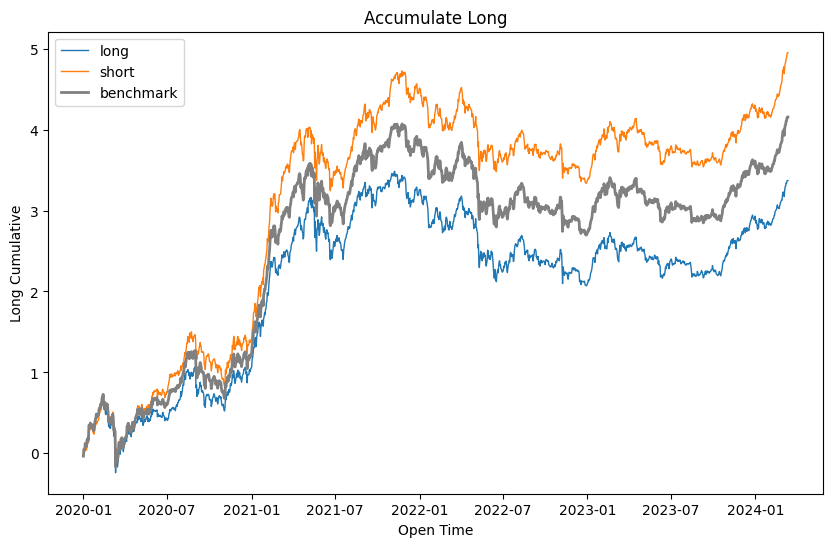

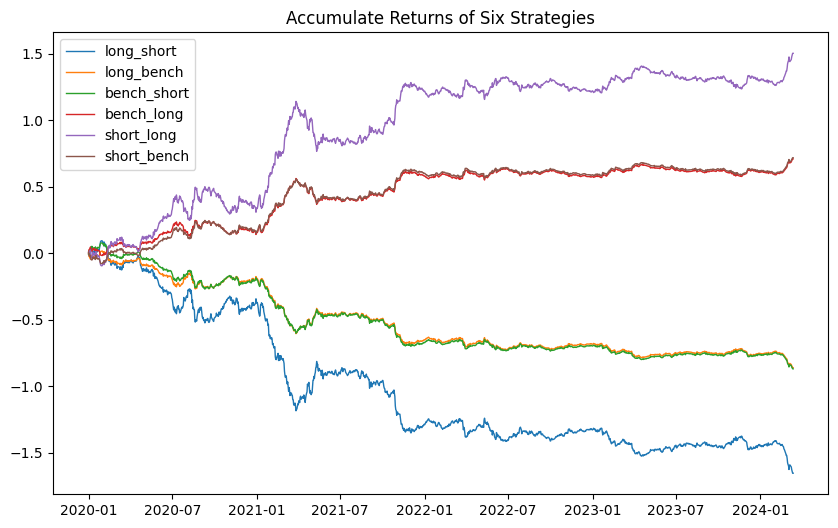

long: 
ann_return = 19.2606  sharpe = 4.3393  maxdd = 0.5467  calmar_ratio = 35.2315  

short: 
ann_return = 28.28  sharpe = 5.939  maxdd = 0.5022  calmar_ratio = 56.3151  

bench: 
ann_return = 23.7448  sharpe = 5.2089  maxdd = 0.5174  calmar_ratio = 45.8928  

long_short: 
ann_return = -9.4574  sharpe = -7.1474  maxdd = 1.5996  calmar_ratio = -5.9123  

long_bench: 
ann_return = -4.9222  sharpe = -7.4135  maxdd = 0.8635  calmar_ratio = -5.7005  

bench_long: 
ann_return = 4.0462  sharpe = 6.0941  maxdd = 0.1247  calmar_ratio = 32.4462  

short_long: 
ann_return = 8.5814  sharpe = 6.4854  maxdd = 0.1754  calmar_ratio = 48.9274  

short_bench: 
ann_return = 4.0972  sharpe = 6.1103  maxdd = 0.1175  calmar_ratio = 34.8597  

bench_short: 
ann_return = -4.9732  sharpe = -7.4166  maxdd = 0.8795  calmar_ratio = -5.6544  



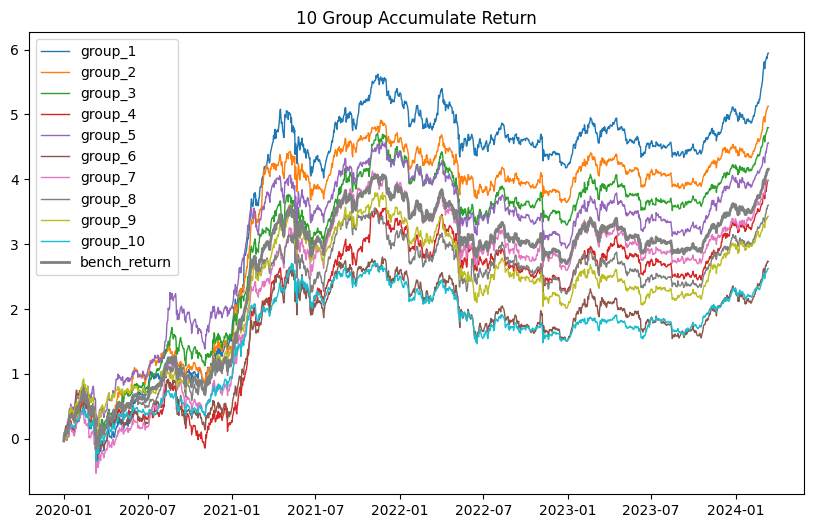

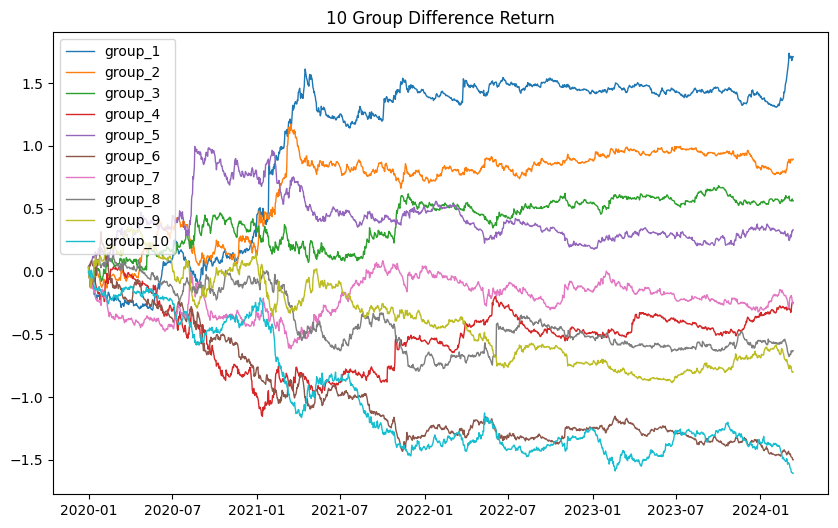

group_1: 
ann_return = 33.9622  sharpe = 6.6597  maxdd = 0.6415  calmar_ratio = 52.945  

group_2: 
ann_return = 29.2914  sharpe = 6.0446  maxdd = 0.5256  calmar_ratio = 55.7332  

group_3: 
ann_return = 27.3974  sharpe = 5.5159  maxdd = 0.4966  calmar_ratio = 55.1739  

group_4: 
ann_return = 22.7671  sharpe = 4.5012  maxdd = 0.5549  calmar_ratio = 41.0284  

group_5: 
ann_return = 26.0742  sharpe = 5.1613  maxdd = 0.3811  calmar_ratio = 68.4153  

group_6: 
ann_return = 15.6092  sharpe = 3.2329  maxdd = 0.6045  calmar_ratio = 25.8206  

group_7: 
ann_return = 22.7223  sharpe = 4.5724  maxdd = 0.6703  calmar_ratio = 33.8975  

group_8: 
ann_return = 20.5764  sharpe = 4.2451  maxdd = 0.5026  calmar_ratio = 40.9405  

group_9: 
ann_return = 19.6001  sharpe = 4.2493  maxdd = 0.4769  calmar_ratio = 41.1018  

group_10: 
ann_return = 14.9937  sharpe = 3.7917  maxdd = 0.5602  calmar_ratio = 26.7666  

-----------------------------------------
group_difference_1: 
ann_return = 9.7794  sharpe

In [17]:
factors = df.select(['open_time', 'symbol', 'vwap'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()